# CSC321H5 Project 1. Music Millenium Classification

**Deadline**: Thursday, Jan. 30, by 9pm

**Submission**: Submit a PDF export of the completed notebook. 

**Late Submission**: Please see the syllabus for the late submission criteria.

To celebrate the start of a new decade, we will build models to predict which
**century** a piece of music was released.  We will be using the "YearPredictionMSD Data Set"
based on the Million Song Dataset. The data is available to download from the UCI 
Machine Learning Repository. Here are some links about the data:

- https://archive.ics.uci.edu/ml/datasets/yearpredictionmsd
- http://millionsongdataset.com/pages/tasks-demos/#yearrecognition

## Question 1. Data

Start by setting up a Google Colab notebook in which to do your work.
If you are working with a partner, you might find this link helpful:

- https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb

The recommended way to work together is pair coding, where you and your partner are sitting together and writing code together.

In [0]:
# CODE LINK
https://colab.research.google.com/drive/1s0Nvn9b4PxUw6rgJhUchq1DMY4Pme25F

In [0]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

Now that your notebook is set up, we can load the data into the notebook. The code below provides
two ways of loading the data: directly from the internet, or through mounting Google Drive.
The first method is easier but slower, and the second method is a bit involved at first, but
can save you time later on. You will need to mount Google Drive for later assignments, so we recommend
figuring how to do that now.

Here are some resources to help you get started:

- http.://colab.research.google.com/notebooks/io.ipynb

In [0]:
load_from_drive = False

if not load_from_drive:
  csv_path = "http://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip"
else:
  from google.colab import drive
  drive.mount('/content/gdrive')
  csv_path = '/content/drive/My Drive/YearPredictionMSD.txt.zip' # TODO - UPDATE ME!

t_label = ["year"]
x_labels = ["var%d" % i for i in range(1, 91)]
df = pandas.read_csv(csv_path, names=t_label + x_labels)

In [5]:
print(x_labels)
print(t_label)
print(df["year"])

['var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7', 'var8', 'var9', 'var10', 'var11', 'var12', 'var13', 'var14', 'var15', 'var16', 'var17', 'var18', 'var19', 'var20', 'var21', 'var22', 'var23', 'var24', 'var25', 'var26', 'var27', 'var28', 'var29', 'var30', 'var31', 'var32', 'var33', 'var34', 'var35', 'var36', 'var37', 'var38', 'var39', 'var40', 'var41', 'var42', 'var43', 'var44', 'var45', 'var46', 'var47', 'var48', 'var49', 'var50', 'var51', 'var52', 'var53', 'var54', 'var55', 'var56', 'var57', 'var58', 'var59', 'var60', 'var61', 'var62', 'var63', 'var64', 'var65', 'var66', 'var67', 'var68', 'var69', 'var70', 'var71', 'var72', 'var73', 'var74', 'var75', 'var76', 'var77', 'var78', 'var79', 'var80', 'var81', 'var82', 'var83', 'var84', 'var85', 'var86', 'var87', 'var88', 'var89', 'var90']
['year']
0         2001
1         2001
2         2001
3         2001
4         2001
          ... 
515340    2006
515341    2006
515342    2006
515343    2006
515344    2005
Name: year, Length: 5153

Now that the data is loaded to your Colab notebook, you should be able to display the Pandas
DataFrame `df` as a table:

In [6]:
# Preform some explanatory data analysis

print(df.shape) # 515345 rows, 91 columns
print(df.head())
print(df.tail())
print(df.columns)
df.info()


(515345, 91)
   year      var1      var2      var3  ...      var87     var88      var89     var90
0  2001  49.94357  21.47114  73.07750  ...   68.40795  -1.82223  -27.46348   2.26327
1  2001  48.73215  18.42930  70.32679  ...   70.49388  12.04941   58.43453  26.92061
2  2001  50.95714  31.85602  55.81851  ... -115.00698  -0.05859   39.67068  -0.66345
3  2001  48.24750  -1.89837  36.29772  ...  -72.08993   9.90558  199.62971  18.85382
4  2001  50.97020  42.20998  67.09964  ...   51.76631   7.88713   55.66926  28.74903

[5 rows x 91 columns]
        year      var1      var2  ...     var88     var89     var90
515340  2006  51.28467  45.88068  ...   3.42901 -41.14721 -15.46052
515341  2006  49.87870  37.93125  ...  12.96552  92.11633  10.88815
515342  2006  45.12852  12.65758  ...  -6.07171  53.96319  -8.09364
515343  2006  44.16614  32.38368  ...  20.32240  14.83107  39.74909
515344  2005  51.85726  59.11655  ...  -5.51512  32.35602  12.17352

[5 rows x 91 columns]
Index(['year', 'var1', 

To set up our data for classification, we'll use the "year" field to represent
whether a song was released in the 20-th century. In our case `df["year"]` will be 1 if
the year was released after 2000, and 0 otherwise.

In [0]:
df["year"] = df["year"].map(lambda x: int(x > 2000))

In [8]:
# lets see what our data looks like
 df


,year,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,...,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68,var69,var70,var71,var72,var73,var74,var75,var76,var77,var78,var79,var80,var81,var82,var83,var84,var85,var86,var87,var88,var89,var90
0,1,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,3.32136,-2.31521,10.20556,611.10913,951.08960,698.11428,408.98485,383.70912,326.51512,238.11327,251.42414,187.17351,100.42652,179.19498,-8.41558,-317.87038,95.86266,48.10259,-95.66303,-18.06215,1.96984,34.42438,11.72670,1.36790,7.79444,-0.36994,-133.67852,-83.26165,-37.29765,...,-25.38187,-3.90772,13.29258,41.55060,-7.26272,-21.00863,105.50848,64.29856,26.08481,-44.59110,-8.30657,7.93706,-10.73660,-95.44766,-82.03307,-35.59194,4.69525,70.95626,28.09139,6.02015,-37.13767,-41.12450,-8.40816,7.19877,-8.60176,-5.90857,-12.32437,14.68734,-54.32125,40.14786,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,1,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,4.59210,2.21920,0.34006,44.38997,2056.93836,605.40696,457.41175,777.15347,415.64880,746.47775,366.45320,317.82946,273.07917,141.75921,317.35269,19.48271,-65.25496,162.75145,135.00765,-96.28436,-86.87955,17.38087,45.90742,32.49908,-32.85429,45.10830,26.84939,-302.57328,-41.71932,-138.85034,...,28.55107,1.52298,70.99515,-43.63073,-42.55014,129.82848,79.95420,-87.14554,-45.75446,-65.82100,-43.90031,-19.45705,12.59163,-407.64130,42.91189,12.15850,-88.37882,42.25246,46.49209,-30.17747,45.98495,130.47892,13.88281,-4.00055,17.85965,-18.32138,-87.99109,14.37524,-22.70119,-58.81266,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,1,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,1.39518,2.73553,0.82804,7.46586,699.54544,1016.00954,594.06748,355.73663,507.39931,387.69910,287.15347,112.37152,161.68928,144.14353,199.29693,-4.24359,-297.00587,-148.36392,-7.94726,-18.71630,12.77542,-25.37725,9.71410,0.13843,26.79723,6.30760,28.70107,-74.89005,-289.19553,-166.26089,...,18.50939,16.97216,24.26629,-10.50788,-8.68412,54.75759,194.74034,7.95966,-18.22685,0.06463,-2.63069,26.02561,1.75729,-262.36917,-233.60089,-2.50502,-12.14279,81.37617,2.07554,-1.82381,183.65292,22.64797,-39.98887,43.37381,-31.56737,-4.88840,-36.53213,-23.94662,-84.19275,66.00518,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,1,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,-6.36304,6.63016,-3.35142,37.64085,2174.08189,697.43346,459.24587,742.78961,229.30783,387.89697,249.06662,245.89870,176.20527,98.82222,150.97286,78.49057,-62.00282,43.49659,-96.42719,-108.96608,14.22854,14.54178,-23.55608,-39.36953,-43.59209,20.83714,35.63919,-181.34947,-93.66614,-90.55616,...,4.56917,-37.32280,4.15159,12.24315,35.02697,-178.89573,82.46573,-20.49425,101.78577,-19.77808,-21.52657,3.36303,-11.63176,51.55411,-50.57576,-28.14755,-83.15795,-7.35260,-22.11505,1.18279,-122.70467,150.57360,24.37468,41.19821,-37.04318,-28.72986,162.19614,22.18309,-8.63509,85.23416,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,1,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,0.93609,1.60923,2.19223,47.32082,894.28471,809.86615,318.78559,435.04497,341.61467,334.30734,322.99589,190.61921,235.84715,96.89517,210.58870,5.60463,-199.63958,204.85812,-77.17695,-65.79741,-6.95097,-12.15262,-3.85410,20.68990,-20.30480,37.15045,11.20673,-124.09519,-295.98542,-33.31169,...,45.25506,10.42226,27.88782,-17.12676,-31.54772,-76.86293,41.17343,-138.32535,-53.96905,-21.30266,-24.87362,-2.46595,-4.05003,-56.51161,-34

### Part (a) -- 2 pts

The data set description text asks us to respect the below train/test split to
avoid the "producer effect". That is, we want to make sure that no song from a single artist
ends up in both the training and test set.

Explain why it would be problematic to have
some songs from an artist in the training set, and other songs from the same artist in the
test set. (Hint: Remember that we want our test accuracy to predict how well the model
will perform in practice on a song it hasn't learned about.)

In [0]:
df_train = df[:463715]
df_test = df[463715:] 

# convert to numpy
# Nested lists for all row (All columns are included) from 0 - 450k
train_xs = df_train[x_labels].to_numpy()
# Array  of 1s and 0s for the training dataset 
train_ts = df_train[t_label].to_numpy()

test_xs = df_test[x_labels].to_numpy()
test_ts = df_test[t_label].to_numpy()

# Write your explanation here
# This is problematic because we don't want our model to predict artists but rather be generalizable, for classification of songs from artists its never seen.
# This is also because we don't want our model to over fit and work just for the training data. We want our model to predict the millennia not the artist. 

### Part (b) -- 1 pts

It can be beneficial to **normalize** the columns, so that each column (feature)
has the *same* mean and standard deviation.

In [0]:
feature_means = df_train.mean()[1:].to_numpy() # the [1:] removes the mean of the "year" field
feature_stds  = df_train.std()[1:].to_numpy()
# Normalizing the data 
train_norm_xs = (train_xs - feature_means) / feature_stds
test_norm_xs = (test_xs - feature_means) / feature_stds

Notice how in our code, we normalized the test set using the *training data means and standard deviations*.
This is *not* a bug.

Explain why it would be improper to compute and use test set means
and standard deviations. (Hint: Remember what we want to use the test accuracy to measure.)

In [0]:
# Write your explanation here
# We normalize this with the training dataset because we want to be able to compare our model to the same target which we defined by normalizing the first one. 
# Also, if we were to normalize with their own respective means and standard deviations, we would not be able to compare the accuracy of our model based on the training dataset.  

### Part (c) -- 1 pts

Finally, we'll move some of the data in our training set into a validation set.

Explain why we should limit how many times we use the test set, and that we should use the validation
set during the model building process.

In [12]:
# shuffle the training set
reindex = np.random.permutation(len(train_xs))
print(reindex)
train_xs = train_xs[reindex]
train_norm_xs = train_norm_xs[reindex]
train_ts = train_ts[reindex]

# use the first 50000 elements of `train_xs` as the validation set
train_xs, val_xs           = train_xs[50000:], train_xs[:50000]
train_norm_xs, val_norm_xs = train_norm_xs[50000:], train_norm_xs[:50000]
train_ts, val_ts           = train_ts[50000:], train_ts[:50000]

# Write your explanation here
# We should use the validation set during model building so that we do not use the test set
# We should limit use of the test set because overuse "would be “cheating.” We’re only allowed to use the test set once, to report the final
# performance. If we “peek” at the test data by using it to tune hyperparameters, it will no longer give a realistic estimate of generalization". 
# ie. we will overestimate how well our model will perform on new data


[351423  20922 249172 ... 336005 274331 319760]


## Part 2. Classification

We will first build a *classification* model to perform decade classification.
These helper functions are written for you. All other code that you write in this
section should be vectorized whenever possible, and you will be penalized for 
not vectorizing your code.

In [0]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))
    
def cross_entropy(t, y):
  return -t * np.log(y) - (1 - t) * np.log(1 - y)

def cost(y, t):
  return np.mean(cross_entropy(t, y))

def get_accuracy(y, t):
  acc = 0
  N = 0
  for i in range(len(y)):
    N += 1
    if (y[i] >= 0.5 and t[i] == 1) or (y[i] < 0.5 and t[i] == 0):
      acc += 1
  return acc / N

### Part (a) -- 2 pts

Write a function `pred` that computes the prediction `y` based on weights `w` and bias `b`.

In [0]:
def pred(w, b, X):
  """
  Returns the prediction `y` of the target based on the weights `w` and scalar bias `b`.

  Preconditions: np.shape(w) == (90,)
                 type(b) == float
                 np.shape(X) = (N, 90) for some N

  >>> pred(np.zeros(90), 1, np.ones([2, 90]))
  array([0.73105858, 0.73105858]) # It's okay if your output differs in the last decimals
  """
  
  # take the dot product of X and w add a scalar b elementwise 
  z= np.dot(X, w)+b
  return sigmoid(z)



### Part (b) -- 3 pts

Write a function `derivative_cost` that computes and returns the gradients 
$\frac{\partial\mathcal{E}}{\partial {\bf w}}$ and
$\frac{\partial\mathcal{E}}{\partial b}$.

In [0]:
def derivative_cost(X, y, t):
  """
  Returns a tuple containing the gradients dE/dw and dE/db.

  Precondition: np.shape(X) == (N, 90) for some N
                np.shape(y) == (N,) 
                np.shape(t) == (N,)

  Postcondition: np.shape(dEdw) = (90,)
           type(dEdb) = float
  """
  # Your code goes here
  # elementwise subtraction of y-t  
  dedb=(y-t)
  N=len(y)
  # Mean just gets us the sum/N
  dEdb=np.mean(dedb)
  # Dot product gives us the sum already, so just need to divide by N to get the cost derivative
  dEdw=(np.dot(X.T,dedb))/N

 
  return (dEdb,dEdw)
  



### Part (c) -- 2 pts

We can check that our derivative is implemented correctly using the finite difference rule. In 1D, the
finite difference rule tells us that for small $h$, we should have

$$\frac{f(x+h) - f(x)}{h} \approx f'(x)$$

Prove to yourself (and your TA) that $\frac{\partial\mathcal{E}}{\partial b}$  is implement correctly
by comparing the result from `derivative_cost` with the value of `(pred(w, b + h, X) - pred(w, b, X)) / h`.
Justify your choice of `w`, `b`, and `X`.

In [43]:
# Your code goes here
h =.000000001

# Building the model
X=np.array([[1,22,2930],[1,17,3350],[1,22,2640],[1,20,3250],[1,15,4080]])
t=np.array([[0],[1],[0],[1],[1]])
w=((np.transpose(X)).dot(X))
w=np.linalg.inv(w).dot(np.transpose(X)) 
# Linear regression weights 
w=w.dot(t)
# intercept
b=w[0]
w=w[1:]
# to not calculate intercept twice 
X=np.delete(X,0,1)

# The model
y=pred(w,b+h,X)
# First principle derivative
k=(cost(pred(w,(b+h),X),t))
j=(cost(pred(w, b, X),t))
fin=(k-j)/h
print(fin)
# Comparisoin
derivative_cost(X,y,t)
# Chose X from a publicly available datset on prices of automobiles
# Then, use multiple regression formula to choose our weigts w and bias b 
# We can see that they are the same

0.04008826604007254


(0.04008833101296825, array([[  1.64298433],
        [-14.98746718]]))

### Part (d) -- 2 pts

Prove to yourself (and your TA) that $\frac{\partial\mathcal{E}}{\partial {\bf w}}$  is implement correctly.

In [49]:
# Your code goes here. You might find this below code helpful: but it's
# up to you to figure out how/why, and how to modify the code
h = 0.000001
H = np.zeros(90)
H[0] = h
# same as above (Building the model)
X=np.array([[1,22,2930],[1,17,3350],[1,22,2640],[1,20,3250],[1,15,4080]])
t=np.array([[0],[1],[0],[1],[1]])
w=((np.transpose(X)).dot(X))
w=np.linalg.inv(w).dot(np.transpose(X)) 
w=w.dot(t)
b=w[0]
w=w[1:]
X=np.delete(X,0,1)
# Computing first principle derivative
y=pred(w+h,b,X)
k=(cost(pred(w+h,b,X),t))
j=(cost(pred(w, b, X),t))
fin=(k-j)/h
print(fin)
# We can that the second value is the same in the tuple in our example
derivative_cost(X,y,t)


-12.17374842987784


(0.04080264356714784, array([[  1.65669112],
        [-12.66013709]]))

### Part (e) -- 4 pts

Now that you have a gradient function that works, we can actually run gradient descent! Complete
the following code that will run stochastic: gradient descent training:

In [0]:
def run_gradient_descent(w0, b0, alpha=0.1, batch_size=100, max_iters=100):
  """Return the values of (w, b) after running gradient descent for max_iters.
  We use:
    - train_norm_xs and train_ts as the training set
    - val_norm_xs and val_ts as the test set
    - alpha as the learning rate
    - (w0, b0) as the initial values of (w, b)

  Precondition: np.shape(w0) == (90,)
                type(b0) == float
 
  Postcondition: np.shape(w) == (90,)
                 type(b) == float
  """
  w = w0
  b = b0
  iter = 0
  #print(alpha)
  val_cost=0
  val_acc=0
  iters=0
  
  
  iters_sub, valloss, valaccs  = [], [] ,[]
  while iter < max_iters:
    # shuffle the training set (there is code above for how to do this)
    #************* reshuffle from above, suitable here?
    reindex = np.random.permutation(len(train_xs))
    #print(reindex)
    train_xsnew = train_xs[reindex]
    train_norm_xsnew = train_norm_xs[reindex]
    train_tsnew = train_ts[reindex]
    
    #******************
    
    for i in range(0, len(train_norm_xsnew), batch_size): # iterate over each minibatch
      # minibatch that we are working with:
      X = train_norm_xsnew[i:(i + batch_size)]
      #print(X.shape)
      t = train_tsnew[i:(i + batch_size), 0]
      #v=val_norm_xs[i:(i + batch_size), 0]
      #print(X.shape)
      # since len(train_norm_xs) does not divide batch_size evenly, we will skip over
      # the "last" minibatch
      if np.shape(X)[0] != batch_size:
        continue

      # compute the prediction
      # y = ...
      #print(w.shape, X.shape)
      y=pred(w,b,X)
      # updating weights and bias
      db,dw = derivative_cost(X,y,t)
      w=w-alpha*dw
      b=b-alpha*db
     
      # increment the iteration count
      iter += 1

      #print(val_norm_xs.shape)
      if (iter % 10 == 0):
        train_cost=cost(y,t)
        val_cost=0
        val_y=np.zeros((50000,1))
        
        # Computing val_y in batches to save ram
        for j in range(0, len(val_norm_xs), batch_size): 
          
          # minibatch that we are working with:
          valnx = val_norm_xs[j:(j + batch_size)]
          #valts = val_ts[j:(j + batch_size)]
        
          # since len(train_norm_xs) does not divide batch_size evenly, we will skip over
          # the "last" minibatch
          if np.shape(X)[0] != batch_size: 
            continue
  
          ky=pred(w,b,valnx)
          
          val_y[j:j+batch_size,0]=ky  #use val_norm_xs))
        
          j+=batch_size
          if j>len(val_norm_xs):
            break
       
        #for print statement
        val_cost = cost(val_y,val_ts)#[:,0])
        val_acc = get_accuracy(val_y,val_ts)#[:,0])
        
        #for plots
        valaccs.append(val_acc)
        iters_sub.append(iters)
        valloss.append(val_cost)
        print("Iter %d. [Val Acc %.0f%%, Loss %f] [Train Loss %f]" % (iter, val_acc * 100, val_cost, train_cost))
      iters+=1  

      if iter >= max_iters:
        break
 
  # plot validation cost
  plt.title("Training Curve (batch_size={}, lr={})".format(batch_size, alpha))
  plt.plot(iters_sub, valloss, label="Train")
  plt.xlabel("Iterations")
  plt.ylabel("Loss")
  plt.show()
 
  # plot validation accuracy
  plt.title("Training Curve (batch_size={}, lr={})".format(batch_size, alpha))
 
  #plt.plot(iters_sub, trainaccs, label="Train")
  plt.plot(iters_sub, valaccs, label="Validation")
  plt.xlabel("Iterations")
  plt.ylabel("Accuracy")
  plt.legend(loc='best')
  plt.show()
 
  # returning weights and bias
  return(w,b)

### Part (f) -- 2 pts

Call `run_gradient_descent` with the weights and biases all initialized to zero.
Show that if `alpha` is too small, then convergence is slow.
Also, show that if `alpha` is too large, then we do not converge at all!

Iter 10. [Val Acc 66%, Loss 0.686504] [Train Loss 0.687621]
Iter 20. [Val Acc 66%, Loss 0.680523] [Train Loss 0.681162]
Iter 30. [Val Acc 66%, Loss 0.675361] [Train Loss 0.675021]
Iter 40. [Val Acc 67%, Loss 0.670502] [Train Loss 0.672270]
Iter 50. [Val Acc 67%, Loss 0.666326] [Train Loss 0.666581]
Iter 60. [Val Acc 67%, Loss 0.662615] [Train Loss 0.658272]
Iter 70. [Val Acc 67%, Loss 0.659340] [Train Loss 0.659133]
Iter 80. [Val Acc 68%, Loss 0.656162] [Train Loss 0.655941]
Iter 90. [Val Acc 68%, Loss 0.653217] [Train Loss 0.656293]
Iter 100. [Val Acc 68%, Loss 0.650311] [Train Loss 0.646572]


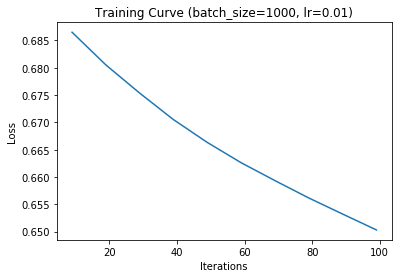

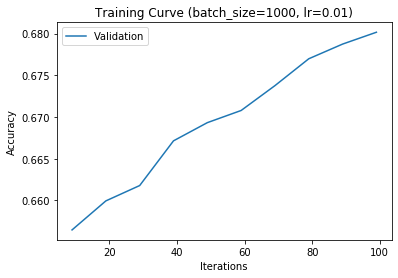

Iter 10. [Val Acc 60%, Loss 1.673513] [Train Loss 1.463158]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


Iter 20. [Val Acc 65%, Loss nan] [Train Loss 0.969631]
Iter 30. [Val Acc 65%, Loss 1.217040] [Train Loss 1.141555]
Iter 40. [Val Acc 62%, Loss 1.518752] [Train Loss nan]
Iter 50. [Val Acc 65%, Loss 1.234340] [Train Loss 1.165042]
Iter 60. [Val Acc 65%, Loss 1.149553] [Train Loss 1.135605]
Iter 70. [Val Acc 66%, Loss 1.142250] [Train Loss 1.057863]
Iter 80. [Val Acc 64%, Loss 1.371844] [Train Loss inf]
Iter 90. [Val Acc 66%, Loss 1.200065] [Train Loss nan]
Iter 100. [Val Acc 66%, Loss 1.088782] [Train Loss 1.073546]


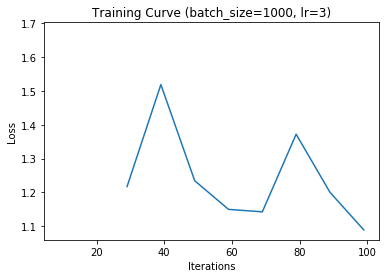

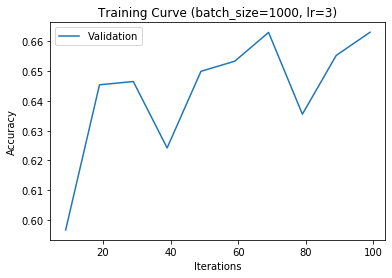

(array([ 3.35555358, -1.69559325, -0.10017512, -0.13377414, -0.3992468 ,
        -1.78335207, -0.03662251, -0.56364633, -0.23098023,  0.06478424,
        -0.5930091 ,  0.07836321,  0.39341719,  0.23982124, -0.34843113,
         0.35802493, -0.17250966,  0.43861944,  0.01450582,  0.2619574 ,
        -0.23477151, -0.16944964,  0.63031201,  0.01556126, -0.25498286,
        -0.0715095 ,  0.33589874,  0.11869969,  0.0937976 ,  0.09082099,
        -0.10193431, -0.12668038, -0.13495383,  0.03197931, -0.05008702,
        -0.44648508, -0.04138807,  0.10231821,  0.44408506,  0.04339553,
        -0.28210845, -0.09479607,  0.18680871, -0.20225131,  0.12463017,
         0.05291122,  0.10152901, -0.4201154 ,  0.02969715, -0.06053893,
        -0.0320483 , -0.11199727, -0.17257856, -0.26036535, -0.02039341,
        -0.02003509, -0.34587148,  0.18456425, -0.13089285, -0.07074161,
        -0.13287171, -0.09172352, -0.22562926,  0.26146742, -0.32167672,
         0.14285153, -0.07663274,  0.15255862, -0.0

In [21]:
w0 = np.zeros(90)
b0 = 0.
# Write your code here
#run_gradient_descent(w0,b0,alpha=.27,batch_size=1000,max_iters=100)

# Too slow
run_gradient_descent(w0,b0,alpha=.01,batch_size=1000,max_iters=100)
# Steps are too small to make progress 

w0 = np.zeros(90)
b0 = 0.
# No convergence
run_gradient_descent(w0,b0,alpha=3,batch_size=1000,max_iters=100)
# Steps are too large, and small deviations can cause divergence  

### Part (g) -- 2 pts

Find the optimial value of ${\bf w}$ and $b$ using your code. Explain how you chose
the learning rate $\alpha$ and the batch size.

Iter 10. [Val Acc 69%, Loss 0.619565] [Train Loss 0.619792]
Iter 20. [Val Acc 71%, Loss 0.598702] [Train Loss 0.598513]
Iter 30. [Val Acc 71%, Loss 0.587126] [Train Loss 0.598447]
Iter 40. [Val Acc 72%, Loss 0.580617] [Train Loss 0.580106]
Iter 50. [Val Acc 72%, Loss 0.576763] [Train Loss 0.569915]
Iter 60. [Val Acc 73%, Loss 0.573240] [Train Loss 0.565030]
Iter 70. [Val Acc 73%, Loss 0.570056] [Train Loss 0.578547]
Iter 80. [Val Acc 73%, Loss 0.568200] [Train Loss 0.557625]
Iter 90. [Val Acc 73%, Loss 0.567807] [Train Loss 0.569580]
Iter 100. [Val Acc 73%, Loss 0.565456] [Train Loss 0.555973]
Iter 110. [Val Acc 73%, Loss 0.564925] [Train Loss 0.568393]
Iter 120. [Val Acc 73%, Loss 0.563374] [Train Loss 0.548976]
Iter 130. [Val Acc 73%, Loss 0.562743] [Train Loss 0.565897]
Iter 140. [Val Acc 73%, Loss 0.564223] [Train Loss 0.545288]
Iter 150. [Val Acc 73%, Loss 0.562838] [Train Loss 0.550852]
Iter 160. [Val Acc 73%, Loss 0.562157] [Train Loss 0.574121]
Iter 170. [Val Acc 73%, Loss 0.56

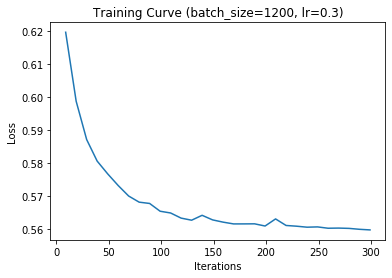

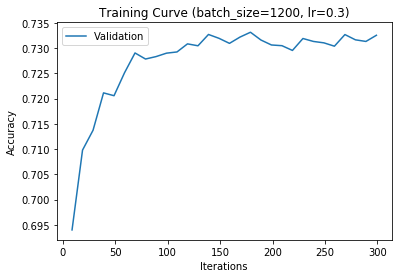

[ 1.28207791e+00 -8.50871853e-01 -1.79393856e-01 -1.42323214e-01
 -5.14512554e-02 -5.37934427e-01  2.42302925e-02 -1.76015293e-01
 -1.52737433e-01  3.58984793e-02 -1.43873603e-01  1.69098624e-02
  2.00756988e-01  1.65651147e-01 -6.96560148e-02  1.92456478e-01
  1.61804941e-02  2.29169175e-01  1.29437090e-01  1.85212657e-01
  3.82858336e-02  6.56258385e-02  2.67830334e-01  9.23241660e-02
 -1.04466845e-01  3.45220644e-02  1.52251138e-01  1.83574224e-02
  2.11748463e-02  5.36069820e-02 -2.15700868e-02 -1.27197158e-02
 -1.00406977e-01  3.64292951e-02  1.20977119e-02 -9.07344908e-02
 -4.52285914e-02  8.76580120e-02  1.01947859e-01 -5.08901431e-02
 -1.17729228e-01 -4.57659767e-02  1.57013883e-02 -2.65096221e-02
  2.55037870e-02  3.44159349e-02  8.20061026e-03 -8.51485880e-02
 -6.22550576e-03 -2.02483271e-02  3.10308533e-02 -2.55584415e-02
  6.00054127e-02 -1.40711881e-02 -3.83802242e-02  5.99925476e-03
 -1.34136425e-01  1.11676060e-01 -4.19481564e-02 -4.45404212e-02
 -1.23634598e-02 -3.90879

In [22]:
w0 = np.zeros(90)
b0 = 0.
# Write your code here
(w_optimal,b_optimal)=run_gradient_descent(w0,b0,alpha=.3,batch_size=1200,max_iters=300)
print(w_optimal,b_optimal)
# We chose learning rate as .3, because we dont want our steps to be too large or too small
# Through trial and error found .3 to converge as well as converge quickly 
# Similarily chose batch size of, 1200 since a batch size that is too large may cause the model to lose generalizability   
# and a model that is too small may be too noisy, as well as have bad implications for runtime

### Part (h) -- 4 pts

Using the values of `w` and `b` from part (g), compute your training accuracy, validation accuracy,
and test accuracy. Are there any differences between those three values? If so, why?

In [23]:
# Write your code here
train_h_y=pred(w_optimal,b_optimal,train_norm_xs)
train_h_accuracy=get_accuracy(train_h_y,train_ts)

validate_h_y=pred(w_optimal,b_optimal,val_norm_xs)
validate_h_accuracy=get_accuracy(validate_h_y,val_ts)

test_h_y=pred(w_optimal,b_optimal,test_norm_xs)
test_h_accuracy=get_accuracy(test_h_y,test_ts)

print("Training accuracy is, ", train_h_accuracy)
print("Validation accuracy is, ", validate_h_accuracy)
print("Testing accuracy is, ",test_h_accuracy)

# There will be, differences between these values since they are different subsets of the whole dataframe
# Differences in these subsets, will cause our accuracies to be different

Training accuracy is,  0.7324583348440351
Validation accuracy is,  0.73252
Testing accuracy is,  0.7255277939182646


### Part (i) -- 4 pts

Writing a classifier like this is instructive, and helps you understand what happens when
we train a model. However, in practice, we rarely write model building and training code
from scratch. Instead, we typically use one of the well-tested libraries available in a package.

Use `sklearn.linear_model.LogisticRegression` to build a linear classifier, and make predictions about the test set. Start by reading the
[API documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

Compute the training, validation and test accuracy of this model.

In [24]:
import sklearn.linear_model
model = sklearn.linear_model.LogisticRegression(verbose=1)
targ=(df["year"])


train=df.drop(labels="year",axis=1)



model.fit(train_norm_xs,train_ts.ravel())
#model.predict
validation_accuracy=get_accuracy(model.predict(val_norm_xs),val_ts.ravel())
training_accuracy=get_accuracy(model.predict(train_norm_xs),train_ts.ravel())
test_accuracy=get_accuracy(model.predict(test_norm_xs),test_ts.ravel())

print("Training accuracy is, ", training_accuracy)
print("Validation accuracy is, ", validation_accuracy)
print("Testing accuracy is, ",test_accuracy)




#model.fit ...

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.3s finished


Training accuracy is,  0.7330988724121678
Validation accuracy is,  0.73204
Testing accuracy is,  0.7269223319775324


## Part 3. Nearest Neighbour

We will compare the nearest neighbour model with the model we built in the earlier parts.

To make predictions for a new data point using k-nearest neighbour, we will need to:

1. Compute the distance from this new data point to every element in the training set
2. Select the top $k$ closest neighbour in the training set
3. Find the most common label among those neighbours

We'll use the validation test to select $k$. That is, we'll select the $k$ that gives the highest
validation accuracy.

Since we have a fairly large data set, computing the distance between a point in the validation
set and all points in the training set will require more RAM than Google Colab provides.
To make the comptuations tractable, we will:

1. Use only a subset of the training set (only the first 100,000 elements)
2. Use only a subset of the validation set (only the first 1000 elements)
3. We will use the **cosine similarity** rather than Euclidean distance. We will also pre-scale
   each element in training set and the validation set to be a unit vector, so that computing
   the cosine similarity is equivalent to computing the dot product. To see this, recall that 
   $$cos(\theta) = \frac{v \cdot w}{||v|| ||w||}$$. But if both ||v|| and ||w|| are zero, then
   only the dot product remains.

In [0]:
# we'll need to take the first 100000 element of `train_norm_xs`
# and scale each of its rows to be unit length
xs = train_norm_xs[:100000]
# compute the norms of each element in the xs
norms = np.linalg.norm(xs, axis=1)
# divide the xs by the norms. Because of numpy's broadcasting rules, we need to
# transpose the matrices a couple of times:
#   https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html
# This gets you your entire dataset divided by norms
# This is a 10,000 by 90 vector
xs = (xs.T / norms).T

### Part (a) -- 1 pt

Create a numpy matrix `val_xs` that contains the first 1000 elements of `val_norm_xs`, scaled
so that each of its rows is unit length. Follow the code above.

In [0]:
# Taking a subset of the validation set
val_xs = val_norm_xs[:1000]
# Compute the norm to make it of lenght 1
norm = np.linalg.norm(val_xs, axis=1)
# Divide the validation set of xs by the norm
# This is a 1000 by 90 matrix
val_xs = (val_xs.T / norm).T

### Part (b) -- 1 pt

Our goal now is to compute the validation accuracy for a choice of $k$. This will
require computing the distance between each song in the training set and each
song in the validation set.

This is actually quite straightforward, and can be done using one matrix
computation operation!

Compute all the distances between elements of `xs` and those of `val_xs`
using a single call to `np.dot`.

In [0]:

# Our training set and Validation set are both N by 90
# We need to transpose the val_xs set to make it 90 by 1000 then we can take the dot produt
# Then compute the dot product between the two and store it as val_distances
# This now stores all of the distances between the validation set and our each of our training example
val_distances = np.dot(xs,val_xs.T)
#np.shape(val_distances)


### Part (c) -- 3 pt

Now that we have the distance pairs, we can use the matrix `val_distances`
to find the set of neighbours for each point in our validation set and 

Find the validation accuracy assuming that we use $k = 10$. You may
use the below helper function if you want, and the `get_accuracy` helper
from the last section.

You might also find it helpful to do parts (c) and (d) together.

In [28]:
def get_nearest_neighbours(i, k=10):
  """Return the indices of the top k-element of `xs` that are closests to
  element `i` of the validation set `val_xs`.
  """
  # sort the element of the training set by distance to the i-th
  # element of val_xs
  neighbours = sorted(enumerate(val_distances[:, i]),
                      key=lambda r: r[1],
                      reverse=True)
  # obtain the top k closest index and return it
  neighbour_indices = [index for (index, dist) in neighbours[:k]]
  return neighbour_indices 

def get_train_ts(indices):
  """Return the labels of the corresponding elements in the training set `xs`.
  Note that `xs` is the first 100,000 elements of `train_xs`, so we can
  simply index `train_ts`.
  """
  return train_ts[indices]

# Write your code here

def get_validation_accuracy(k):
  count = 0
  var_list = np.zeros(1000)
  # Since we know the len is 1000, we can just plug that in 
  # range because we are working with indices
  for i in range(1000):
    # Getting nearest neighbours for each row in the validation set
    NN = get_nearest_neighbours(i,k)
    # Classfying it into labels 
    classified = get_train_ts(NN)
    # put this into ur mean
    var_list[i] = np.mean(classified)
    #Classify that point based on which count is bigger and add it to the list
    #val_list.append(0 if NumCount < 0.5 else 1)
    # get accuracy handles the <0.5 > 1 an
  return get_accuracy(var_list,val_ts)

print(get_validation_accuracy(10))



0.685


### Part (d) -- 2 pts

Compute the validation accuracy for $k = 50, 100, and 1000$.
Which $k$ provides the best results? In other words, which kNN model would you deploy?

In [29]:

# Validation accuracy for k = 50
print(get_validation_accuracy(50))

# Validation accuracy for k = 100
print(get_validation_accuracy(100))

# Validation accuracy for k = 1000
print(get_validation_accuracy(1000))

# We can see below that k = 100 provides the best results. However, due to the results being 
# extremely close to each other, we can conclude that it is not necessary for us to choose the 100 closest
# neighbours. To optimize run time and computational power, we would deploy the K = 50 Model.

0.679
0.686
0.654


### Part (e) -- 4 pt

Compute the test accuracy for the $k$ that you chose in the previous part.
Use only a sample of 1000 elements from the test set to keep the problem tractable.

In [32]:

# Write your code and solution here

# 1) define your training set and test set
test_data_xs = test_norm_xs[:1000]

# 2) Find the norm of the dataset 
normsXS = np.linalg.norm(test_data_xs, axis=1)

# 3) Divide the data by thier respective norms (To do this, we need to transpose a couple times)
test_data_xs = (test_data_xs.T / normsXS).T

# 4) Calculate distances
val_distances = np.dot(xs,test_data_xs.T)

# initialize empty list
ls = np.zeros(1000)

# 5) for each row, get its neighbours & Classify it.
def test_accuracy(k):
    for i in range(1000):
        NN = get_nearest_neighbours(i,k)
        classify = get_train_ts(NN)
        num = np.mean(classify)
        ls[i] = np.mean(classify)
    return get_accuracy(ls,test_ts)

test_accuracy(50)


0.771